In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [10]:
df = pd.read_csv('https://gml.noaa.gov/aftp/data/trace_gases/co2/flask/surface/txt/co2_bme_surface-flask_1_ccgg_month.txt',
    delimiter="\s+",skiprows=54, names=['site',	'year',	'month',	'value'])
df['date'] = pd.to_datetime(df[['year','month']].assign(day=1)).dt.to_period('M')
df=df.set_index(df['date'])

Text(0.5, 1.0, 'Monthly Average CO2 Concentration of St. Davids Head, Bermuda, United Kingdom (BME)')

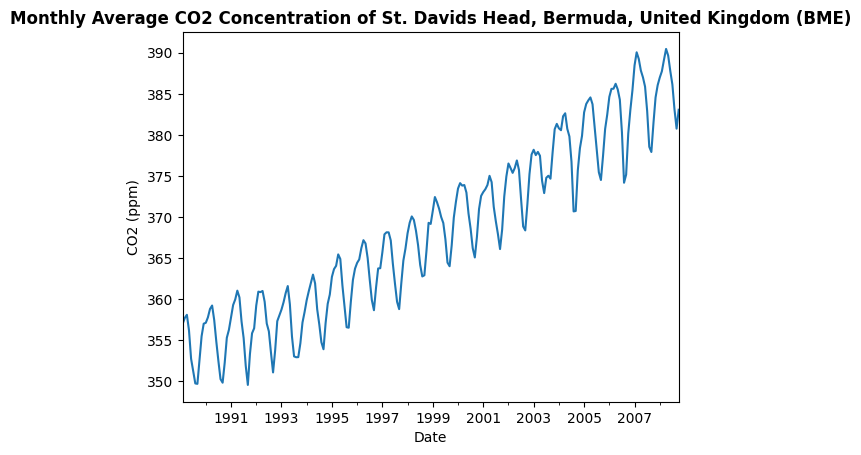

In [11]:
df['value'].plot()
plt.ylabel('CO2 (ppm)')
plt.xlabel('Date')
plt.title('Monthly Average CO2 Concentration of St. Davids Head, Bermuda, United Kingdom (BME)', fontweight='bold')


In [12]:
y_original = df['value']
N_orginal = len(y_original)
N_orginal

237

In [13]:
def fft(x):    # use our y value from our plot/data as x here...
    N = len(x)
    if N <= 1: return x
    even = fft(x[0::2])
    odd =  fft(x[1::2])
    return np.array( [even[k] + np.exp(-2j*np.pi*k/N)*odd[k] for k in range(N//2)] + \
                     [even[k] - np.exp(-2j*np.pi*k/N)*odd[k] for k in range(N//2)] )

# defining the inverse fourier transform function
def ifft(x) :
    from numpy import conj, divide

    # conjugate the complex numbers
    x = np.conj(x)

    # forward fft
    X = fft( x );

    # conjugate the complex numbers again
    X = np.conj(X)

    # scale the numbers
    X = X / len(X)

    return X

In [14]:
df['months'] = [m.n for m in (df.index-df.index[0])]  # creating new months colummn

Text(0.5, 1.0, 'Padded Data')

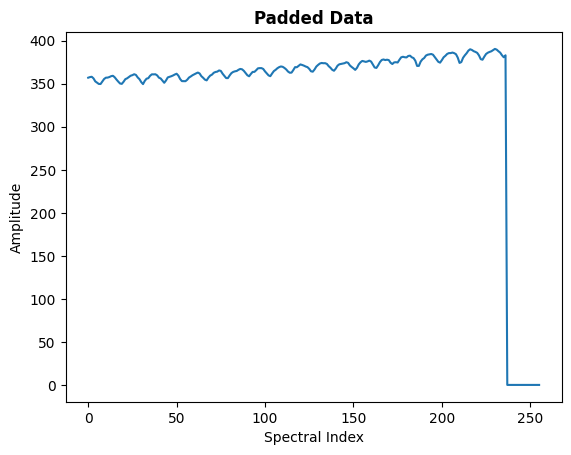

In [27]:
# Padding data

y = df['value']
N = len(y)
log2N = math.log(N,2)
next_pow_of_2 = int(log2N) + 1
if log2N - int(log2N) > 0.0 :
    ypads = np.full( 2**( next_pow_of_2) - N, 0, dtype=np.double)
    y = np.concatenate( (y, ypads) )
x = np.arange(len(y))
N = len(y)
plt.plot(y)
plt.ylabel('Amplitude')
plt.xlabel('Spectral Index')
plt.title('Padded Data', fontweight='bold')

Text(0.5, 1.0, 'Padded + Windowed Data')

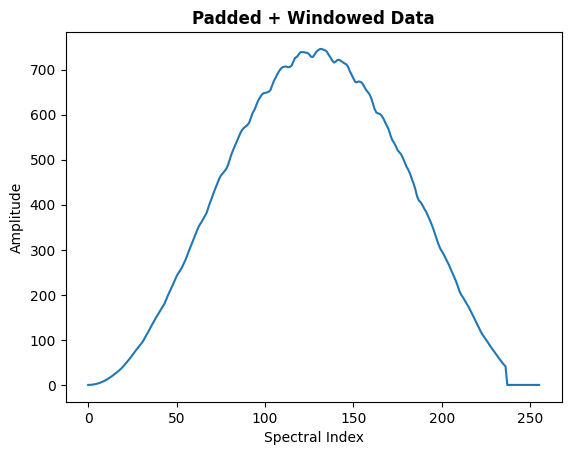

In [29]:
# Windowing
window = 1 - 1 * np.cos(2 * np.pi * x / (len(y) - 1))
y_window = y * window
plt.plot(y_window)
plt.ylabel('Amplitude')
plt.xlabel('Spectral Index')
plt.title('Padded + Windowed Data', fontweight='bold')

Text(0.5, 1.0, 'Padded + Windowed + FFT Data')

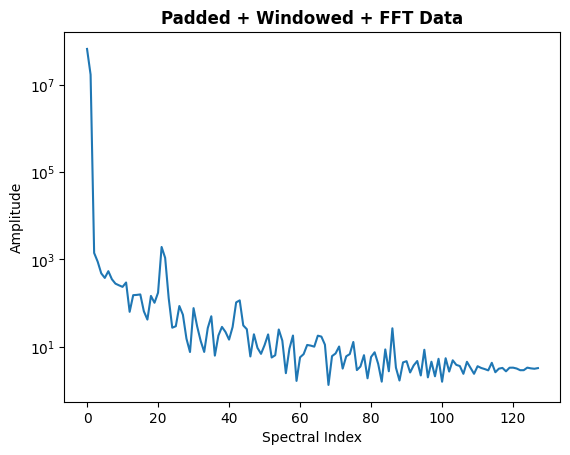

In [38]:
Y = fft(y_window)
plt.plot(np.abs(Y[:int(len(Y)/2)])**2/int(len(Y)/2))
plt.yscale("log")
#plt.xlim(0,50)
plt.ylabel('Amplitude')
plt.xlabel('Spectral Index')
plt.title('Padded + Windowed + FFT Data', fontweight='bold')

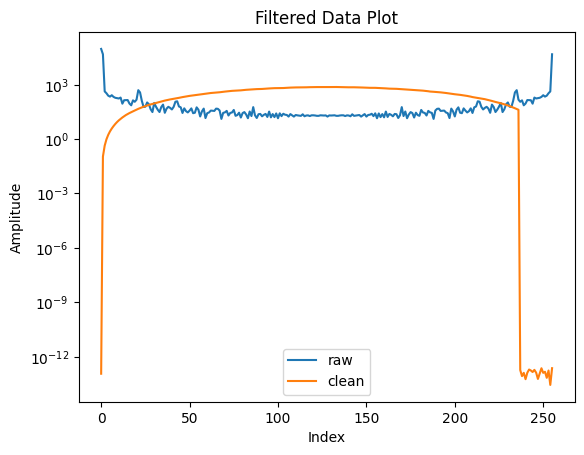

In [39]:
# Filtering



Y_abs = abs(Y) # absolute value

# Inverse FFT
y_filtered = ifft(Y)
y_filtered_abs= abs(y_filtered)



plt.plot(Y_abs, label='raw')
plt.plot(y_filtered_abs, label='clean')
plt.xlabel("Index")  # X-axis label
plt.ylabel("Amplitude")  # Y-axis label
plt.title("Filtered Data Plot")  # Title of the plot
plt.yscale("log")
plt.legend()
plt.show()

In [40]:
# reversing window and padding
y_filtered_unwindow = (y_filtered / window)
y_new = y_filtered_unwindow[:237]

<ipython-input-40-47b70df30a0c>:2: RuntimeWarning: divide by zero encountered in divide
  y_filtered_unwindow = (y_filtered / window)


In [41]:
df['value_clean'] = y_new

In [42]:
df

,site,year,month,value,date,months,value_clean
date,,,,,,,
1989-02,BME,1989,2,357.02,1989-02,0,inf000000000+inf000000000j
1989-03,BME,1989,3,357.73,1989-03,1,3.577300e+02+3.128182e-11j
1989-04,BME,1989,4,358.11,1989-04,2,3.581100e+02+4.726758e-11j
1989-05,BME,1989,5,356.21,1989-05,3,3.562100e+02+5.357718e-12j
1989-06,BME,1989,6,352.76,1989-06,4,3.527600e+02-4.251368e-12j
...,...,...,...,...,...,...,...
2008-06,BME,2008,6,387.78,2008-06,232,3.877800e+02-5.467727e-13j
2008-07,BME,2008,7,386.13,2008-07,233,3.861300e+02-5.901223e-13j
2008-08,BME,2008,8,383.11,2008-08,234,3.831100e+02-2.164820e-13j


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


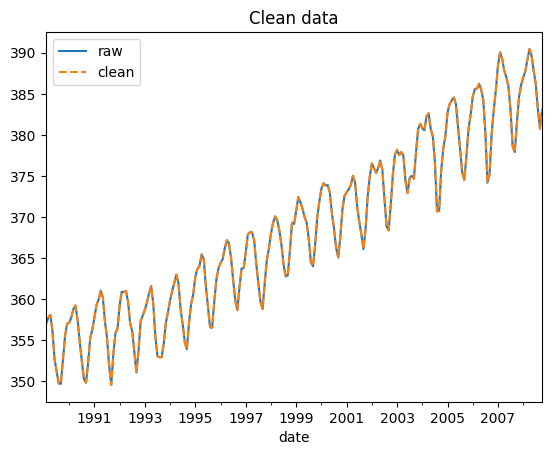

In [43]:
y_original.plot(label = "raw")
df['value_clean'].plot(label = "clean", linestyle='dashed')
plt.title("Clean data")  # Title of the plot
plt.legend()
plt.show()